In [10]:
import pandas as pd
import imblearn

from imblearn.over_sampling import SMOTE

df = pd.read_excel("评分训练集.xlsx")
df['good'] = ((df["点击数"] > 10) & (df["点击率(%)"] > 12)).astype(int)

df["good"].value_counts()

good
0    87152
1      167
Name: count, dtype: int64

In [11]:
# 区分训练集和测试集
from sklearn.model_selection import train_test_split
import numpy as np
X = df.drop("good",axis=1)
y = df['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
y_train


45811    0
50690    0
64468    0
83468    0
52177    0
        ..
2456     0
64961    0
41569    0
57159    0
67099    0
Name: good, Length: 61123, dtype: int64

In [52]:
# 对训练样本进行样本均衡
sm = SMOTE(random_state=42)
X_train,y_train =sm.fit_resample(X_train,y_train)
model_data = pd.concat([X_train,y_train],axis=1)
# model_data.index = range(model_data.shape[0])
test_data = pd.concat([X_test,y_test],axis=1)
test_data.index = range(test_data.shape[0])
test_data


,展现数,点击数,点击率(%),花费,千次展现成本,平均点击成本,直接订单行,直接订单金额,间接订单行,间接订单金额,总订单行,总订单金额,直接加购数,间接加购数,总加购数,转化率(%),投产比,good
0,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
1,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
2,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
3,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
4,2,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
26192,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
26193,1,0,0.0,0.00,0.0,0.00,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
26194,1,1,100.0,0.55,550.0,0.55,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0


In [ ]:
# 投产比 分箱
"""
retbins=True 要求同时返回箱子的索引 和 上限和下限
"""
model_data["qcut"],updown = pd.qcut(model_data["投产比"],retbins=True,q=20,duplicates="drop")
coount_y0 = model_data[model_data["good"] == 0].groupby(by="qcut").count()["good"]
coount_y1 = model_data[model_data["good"] == 1].groupby(by="qcut").count()["good"]


C:\Users\toriel\AppData\Local\Temp\ipykernel_19508\3020048016.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coount_y0 = model_data[model_data["good"] == 0].groupby(by="qcut").count()["good"]
C:\Users\toriel\AppData\Local\Temp\ipykernel_19508\3020048016.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coount_y1 = model_data[model_data["good"] == 1].groupby(by="qcut").count()["good"]
C:\Users\toriel\AppData\Local\Temp\ipykernel_19508\3020048016.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

AttributeError: Can only use .cat accessor with a 'category' dtype

In [14]:
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
num_bins

[(np.float64(0.0), np.float64(0.5267544316936381), 59443, 1563),
 (np.float64(0.5267544316936381), np.float64(1.9757317244502621), 24, 6077),
 (np.float64(1.9757317244502621), np.float64(2.6352827527843394), 50, 6050),
 (np.float64(2.6352827527843394), np.float64(3.2760931120028975), 59, 6042),
 (np.float64(3.2760931120028975), np.float64(3.818532177227034), 40, 6060),
 (np.float64(3.818532177227034), np.float64(4.418313511342836), 75, 6026),
 (np.float64(4.418313511342836), np.float64(5.124283182151179), 84, 6016),
 (np.float64(5.124283182151179), np.float64(5.874447523702586), 82, 6019),
 (np.float64(5.874447523702586), np.float64(6.8247910022768075), 104, 5996),
 (np.float64(6.8247910022768075), np.float64(7.965704901505102), 130, 5971),
 (np.float64(7.965704901505102), np.float64(651.67), 915, 5186)]

In [15]:
def get_woe(num_bins):
    columns = ["下限","上限","0样本数","1样本数"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["总样本数"] = df["0样本数"] + df["1样本数"]
    df["箱样本占比"] = df["总样本数"] / df["总样本数"].sum()
    df["1百分比"] = df["1样本数"] / df["1样本数"].sum()
    df["0百分比"] = df["0样本数"] / df["0样本数"].sum()

    df["woe"] = np.log(df["0百分比"] / df["1百分比"])
    return df
def get_iv(df):
    rate = df["0百分比"] - df["1百分比"]
    iv = np.sum(rate * df["woe"])
    return iv
df = get_woe(num_bins=num_bins)
get_iv(df)

np.float64(7.5628945879787945)

In [27]:
num_bins_ = num_bins.copy()

import matplotlib.pyplot as plt
import scipy
import scipy.stats


pvs = []

for i in range(len(num_bins_)-1):
    x1 = num_bins_[i][2:]
    x2 = num_bins_[i+1][2:]
    # 完全相同的频率分布，说明两者完全独立。即箱变了，但是数值未受到影响，说明和箱体没有关系，则说明两箱独立。此时p值很高。
    # 独立，箱体的变化是否会影响数值或某个特征的分布。
    pv = scipy.stats.chi2_contingency([x1,x2])[1]
    pvs.append(pv)
num_bins_

[(np.float64(0.0), np.float64(0.5267544316936381), 59443, 1563),
 (np.float64(0.5267544316936381), np.float64(1.9757317244502621), 24, 6077),
 (np.float64(1.9757317244502621), np.float64(2.6352827527843394), 50, 6050),
 (np.float64(2.6352827527843394), np.float64(3.2760931120028975), 59, 6042),
 (np.float64(3.2760931120028975), np.float64(3.818532177227034), 40, 6060),
 (np.float64(3.818532177227034), np.float64(4.418313511342836), 75, 6026),
 (np.float64(4.418313511342836), np.float64(5.124283182151179), 84, 6016),
 (np.float64(5.124283182151179), np.float64(5.874447523702586), 82, 6019),
 (np.float64(5.874447523702586), np.float64(6.8247910022768075), 104, 5996),
 (np.float64(6.8247910022768075), np.float64(7.965704901505102), 130, 5971),
 (np.float64(7.965704901505102), np.float64(651.67), 915, 5186)]

In [56]:
# 循环检验卡方值，并进行最大值合并

num_bins_ = num_bins.copy()
def get_bin(num_bins,n):
    IV = []
    axisx = []
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            # print(i)
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        max_index = pvs.index(max(pvs))
        
        # 合并
        num_bins_[max_index:max_index+2] = [(num_bins_[max_index][0]
                                ,num_bins_[max_index+1][1]
                                ,num_bins_[max_index][2]+num_bins_[max_index+1][2]
                                ,num_bins_[max_index][3]+num_bins_[max_index+1][3])]
        df = get_woe(num_bins=num_bins_)
        axisx.append(len(num_bins_))
        iv = get_iv(df)
        IV.append(iv)
    return num_bins_,IV,axisx


In [43]:
after_bins = get_bin( num_bins.copy(),6)
get_woe(after_bins)

,下限,上限,0样本数,1样本数,总样本数,箱样本占比,1百分比,0百分比,woe
0,0.000000,0.526754,59443,1563,61006,0.500000,0.025620,0.974380,3.638411
1,0.526754,1.975732,24,6077,6101,0.050003,0.099613,0.000393,-5.534213
2,1.975732,3.818532,149,18152,18301,0.149993,0.297545,0.002442,-4.802590
3,3.818532,5.874448,241,18061,18302,0.150002,0.296053,0.003950,-4.316713
4,5.874448,7.965705,234,11967,12201,0.099998,0.196161,0.003836,-3.934587
5,7.965705,651.670000,915,5186,6101,0.050003,0.085008,0.014999,-1.734794


In [105]:
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    """
    :param DF: 需要分箱的DataFrame
    :param X: 需要分箱的特征
    :param Y: 目标变量
    :param n: 分箱数
    :param q: 分箱数
    :param graph: 是否画图
    :return:
    """
    # 1.分箱
    DF["qcut"],updown = pd.qcut(DF[X], q=q, retbins=True,duplicates="drop")
    # 取出正负样本
    count_y0 = DF[DF[Y] == 0].groupby(by="qcut",observed=True).count()[Y]
    count_y1 = DF[DF[Y] == 1].groupby(by="qcut",observed=True).count()[Y]

    # 2.计算woe
    num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
    # 3.逐渐减少bin
    num_bins_,IV,axisx = get_bin(num_bins.copy(),n)
    print(num_bins_)
    # 4.画图
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.show()
    return num_bins_
def get_bin(num_bins_,n):
    IV = []
    axisx = []
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            # print(x1,x2)
            if x1[0] == 0 & x2[0] == 0:
                x1 = (1,x1[1])
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        max_index = pvs.index(max(pvs))
        
        # 合并
        num_bins_[max_index:max_index+2] = [(num_bins_[max_index][0]
                                ,num_bins_[max_index+1][1]
                                ,num_bins_[max_index][2]+num_bins_[max_index+1][2]
                                ,num_bins_[max_index][3]+num_bins_[max_index+1][3])]
        df = get_woe(num_bins=num_bins_)
        axisx.append(len(num_bins_))
        iv = get_iv(df)
        IV.append(iv)
    return num_bins_,IV,axisx
def get_woe(num_bins):
    columns = ["下限","上限","0样本数","1样本数"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["总样本数"] = df["0样本数"] + df["1样本数"]
    df["箱样本占比"] = df["总样本数"] / df["总样本数"].sum()
    df["1百分比"] = (df["1样本数"]+1) / (df["1样本数"].sum()+1)
    df["0百分比"] = (df["0样本数"]+1) / (df["0样本数"].sum()+1)
    # print((df["0百分比"]+0.01) / (df["1百分比"]+0.01))
    df["woe"] = np.log(df["0百分比"] / (df["1百分比"]+0.01))
    return df
def get_iv(df):
    rate = df["0百分比"] - df["1百分比"]
    iv = np.sum(rate * df["woe"])
    return iv

点击数
[(np.float64(0.0), np.float64(1.0), 58625, 5833), (np.float64(1.0), np.float64(11.0), 2363, 5922), (np.float64(11.0), np.float64(13.0), 4, 13003), (np.float64(13.0), np.float64(14.0), 1, 8333), (np.float64(14.0), np.float64(20.0), 7, 16744), (np.float64(20.0), np.float64(33.0), 6, 11171)]


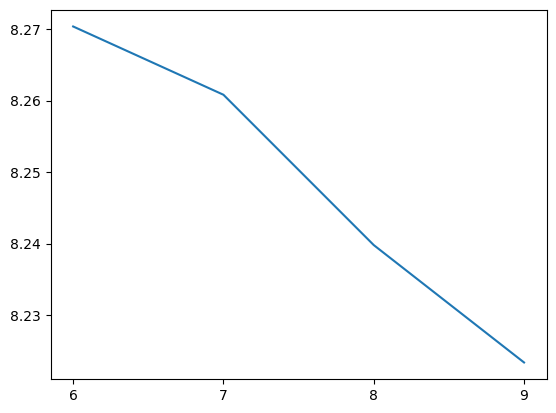

点击率(%)
[(np.float64(0.0), np.float64(14.289421456277736), 54019, 886), (np.float64(14.289421456277736), np.float64(25.064947151814913), 1240, 23163), (np.float64(25.064947151814913), np.float64(32.69699580712465), 138, 18163), (np.float64(32.69699580712465), np.float64(40.693528569076314), 846, 11355), (np.float64(40.693528569076314), np.float64(50.0), 1160, 5996), (np.float64(50.0), np.float64(400.0), 3603, 1443)]


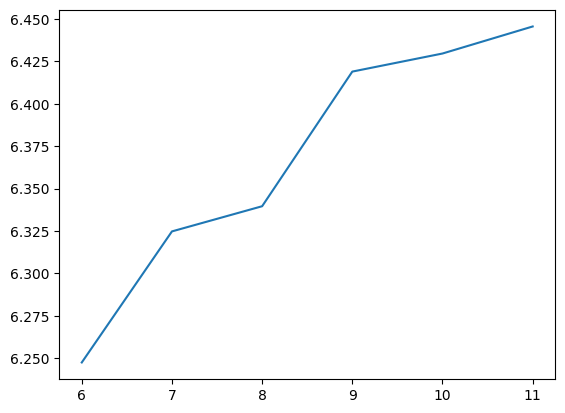

花费
[(np.float64(0.0), np.float64(1.12), 54923, 426), (np.float64(1.12), np.float64(11.040434484265496), 5657, 5809), (np.float64(11.040434484265496), np.float64(19.05031066482895), 292, 6048), (np.float64(19.05031066482895), np.float64(21.990672414535425), 52, 6071), (np.float64(21.990672414535425), np.float64(34.253855481665624), 63, 18264), (np.float64(34.253855481665624), np.float64(68.2916185093832), 12, 24388)]


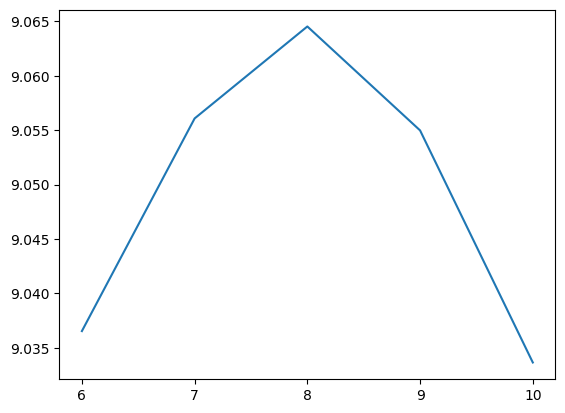

千次展现成本
[(np.float64(0.0), np.float64(155.8635694844608), 54285, 620), (np.float64(155.8635694844608), np.float64(263.5123612063844), 479, 5622), (np.float64(263.5123612063844), np.float64(451.42028178819874), 793, 17509), (np.float64(451.42028178819874), np.float64(927.3304074527202), 1543, 28959), (np.float64(927.3304074527202), np.float64(1229.3717877532704), 917, 5184), (np.float64(1229.3717877532704), np.float64(24280.0), 2989, 3112)]


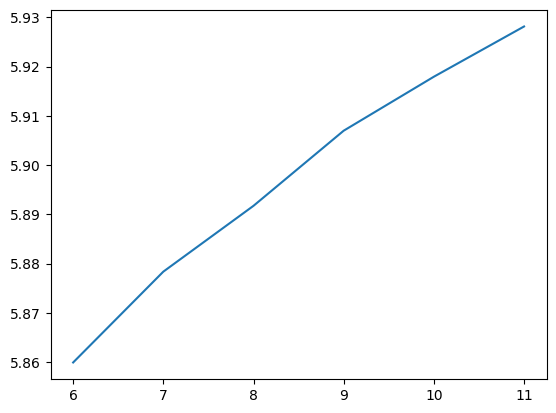

平均点击成本
[(np.float64(0.0), np.float64(0.7819375546990252), 54414, 491), (np.float64(0.7819375546990252), np.float64(1.1853549919559565), 1335, 4766), (np.float64(1.1853549919559565), np.float64(1.4091975639608612), 589, 5512), (np.float64(1.4091975639608612), np.float64(2.228927104839389), 1613, 28889), (np.float64(2.228927104839389), np.float64(3.2803549238218808), 1355, 16947), (np.float64(3.2803549238218808), np.float64(15.83), 1700, 4401)]


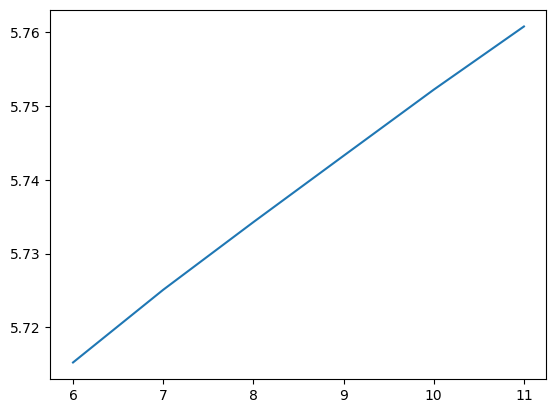

直接订单行
[(np.float64(0.0), np.float64(1.0), 60927, 36651), (np.float64(1.0), np.float64(2.0), 61, 12801), (np.float64(2.0), np.float64(3.0), 9, 6441), (np.float64(3.0), np.float64(9.0), 9, 5113)]


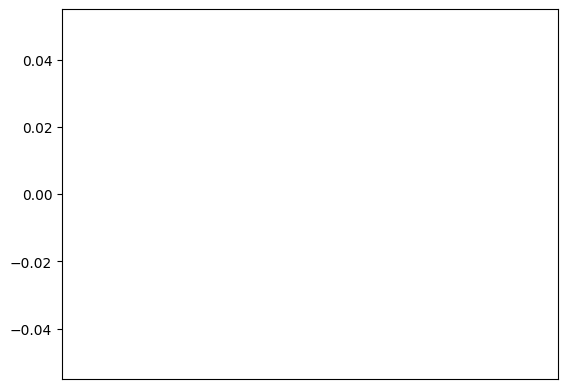

直接订单金额
[(np.float64(0.0), np.float64(7.611479386947437), 60297, 6810), (np.float64(7.611479386947437), np.float64(23.512232422659768), 102, 5998), (np.float64(23.512232422659768), np.float64(36.67592805807896), 80, 6021), (np.float64(36.67592805807896), np.float64(61.52930948768949), 425, 11776), (np.float64(61.52930948768949), np.float64(104.76527109732534), 65, 12136), (np.float64(104.76527109732534), np.float64(404.58), 37, 18265)]


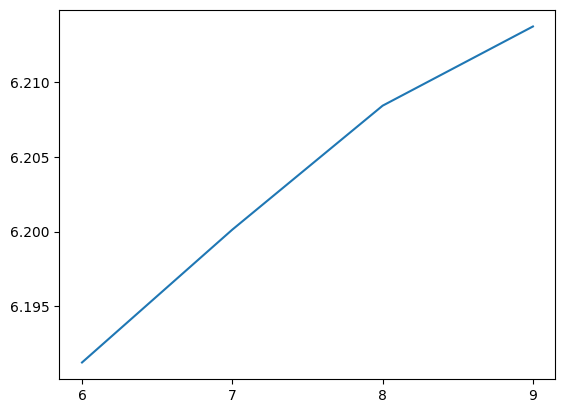

间接订单行
[(np.float64(0.0), np.float64(1.0), 60886, 33982), (np.float64(1.0), np.float64(2.0), 93, 13053), (np.float64(2.0), np.float64(3.0), 19, 4967), (np.float64(3.0), np.float64(5.0), 5, 5448), (np.float64(5.0), np.float64(15.0), 3, 3556)]


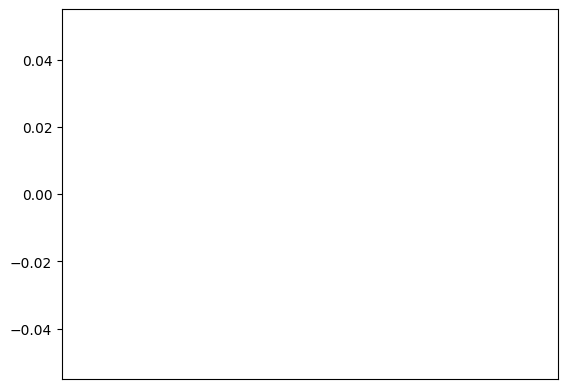

间接订单金额
[(np.float64(0.0), np.float64(9.320173659688152), 60052, 7055), (np.float64(9.320173659688152), np.float64(28.35181078955893), 197, 5903), (np.float64(28.35181078955893), np.float64(45.558452283136475), 274, 5827), (np.float64(45.558452283136475), np.float64(69.19143346006922), 359, 11842), (np.float64(69.19143346006922), np.float64(111.499154263399), 82, 12119), (np.float64(111.499154263399), np.float64(817.9), 42, 18260)]


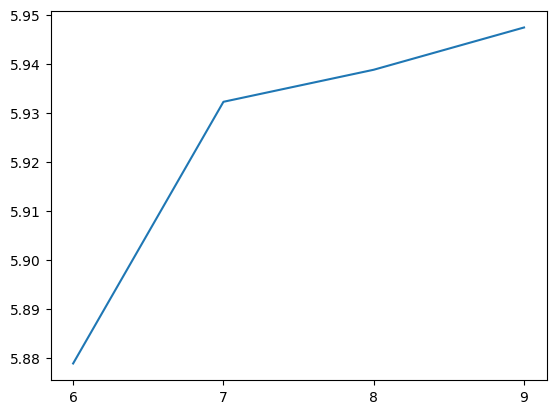

总订单行
[(np.float64(0.0), np.float64(1.0), 60756, 11293), (np.float64(1.0), np.float64(2.0), 182, 10079), (np.float64(2.0), np.float64(3.0), 44, 15421), (np.float64(3.0), np.float64(4.0), 14, 8349), (np.float64(4.0), np.float64(7.0), 7, 11695), (np.float64(7.0), np.float64(19.0), 3, 4169)]


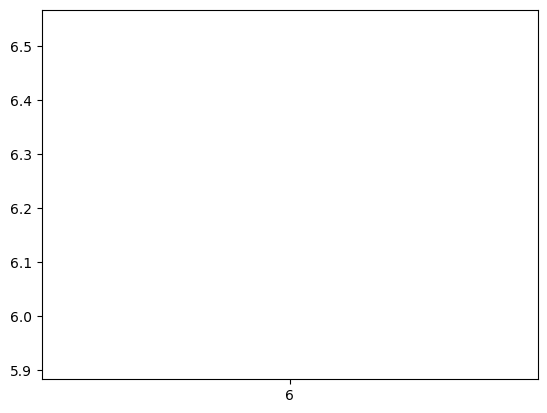

总订单金额
[(np.float64(0.0), np.float64(11.797265501820371), 59444, 1562), (np.float64(11.797265501820371), np.float64(44.96), 780, 5386), (np.float64(44.96), np.float64(65.48553158055876), 504, 5531), (np.float64(65.48553158055876), np.float64(131.83346249261805), 220, 11981), (np.float64(131.83346249261805), np.float64(176.68434100313604), 35, 12166), (np.float64(176.68434100313604), np.float64(983.86), 23, 24380)]


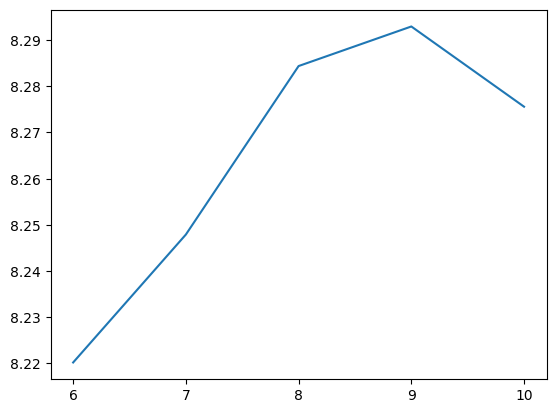

直接加购数
[(np.float64(0.0), np.float64(1.0), 59996, 2132), (np.float64(1.0), np.float64(3.0), 773, 6358), (np.float64(3.0), np.float64(4.0), 125, 3887), (np.float64(4.0), np.float64(6.0), 84, 11902), (np.float64(6.0), np.float64(10.0), 26, 19687), (np.float64(10.0), np.float64(12.0), 2, 5678)]


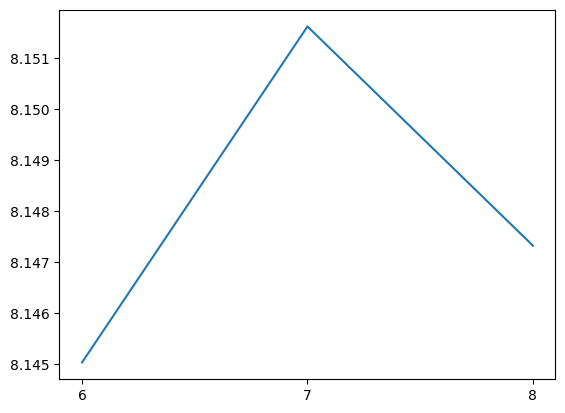

间接加购数
[(np.float64(0.0), np.float64(1.0), 60150, 8340), (np.float64(1.0), np.float64(2.0), 357, 6385), (np.float64(2.0), np.float64(3.0), 183, 5946), (np.float64(3.0), np.float64(5.0), 188, 11091), (np.float64(5.0), np.float64(17.0), 124, 23607), (np.float64(17.0), np.float64(78.0), 4, 5637)]


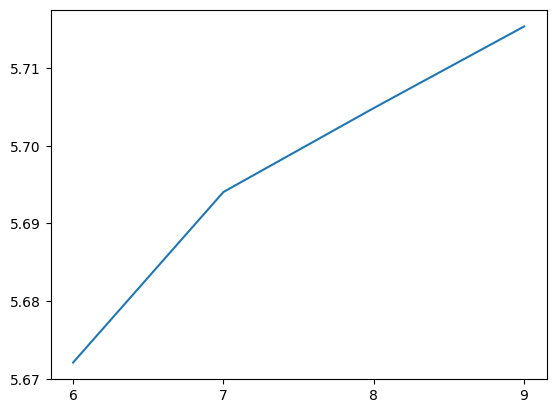

总加购数
[(np.float64(0.0), np.float64(3.0), 60252, 2654), (np.float64(3.0), np.float64(6.0), 507, 4485), (np.float64(6.0), np.float64(8.0), 107, 5304), (np.float64(8.0), np.float64(11.0), 78, 12441), (np.float64(11.0), np.float64(16.0), 44, 14163), (np.float64(16.0), np.float64(123.0), 18, 21959)]


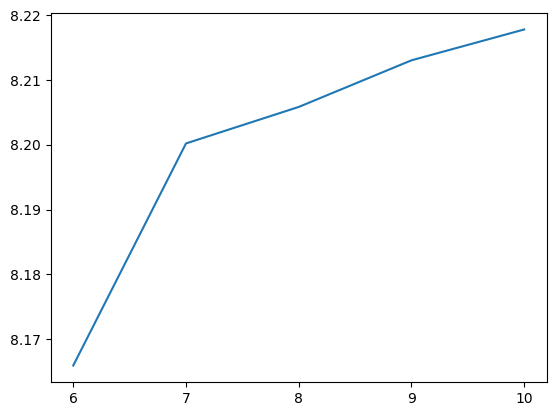

转化率(%)
[(np.float64(0.0), np.float64(2.584679083871717), 59443, 1563), (np.float64(2.584679083871717), np.float64(22.863362341997572), 123, 36480), (np.float64(22.863362341997572), np.float64(25.056641193010073), 74, 6027), (np.float64(25.056641193010073), np.float64(28.682873792468964), 10, 6090), (np.float64(28.682873792468964), np.float64(34.03484695932001), 157, 5944), (np.float64(34.03484695932001), np.float64(500.0), 1199, 4902)]


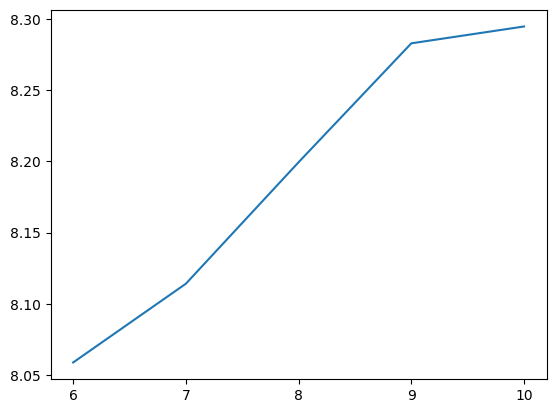

投产比
[(np.float64(0.0), np.float64(0.5267544316936381), 59443, 1563), (np.float64(0.5267544316936381), np.float64(1.9757317244502621), 24, 6077), (np.float64(1.9757317244502621), np.float64(3.818532177227034), 149, 18152), (np.float64(3.818532177227034), np.float64(5.874447523702586), 241, 18061), (np.float64(5.874447523702586), np.float64(7.965704901505102), 234, 11967), (np.float64(7.965704901505102), np.float64(651.67), 915, 5186)]


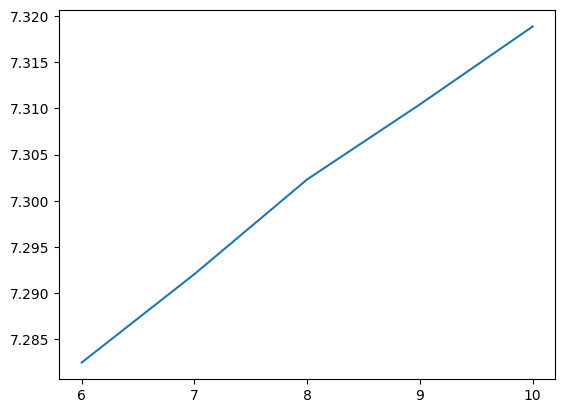

In [107]:
for i in model_data.columns[1:-2]:
    print(i)
    graphforbestbin(model_data,i,"good",n=6,q=20,graph=True)

(59996, 2132) (773, 6358)
(773, 6358) (125, 3887)
(125, 3887) (84, 11902)
(84, 11902) (7, 5585)
(7, 5585) (5, 5905)
(5, 5905) (9, 4570)
(9, 4570) (0, 3627)
(0, 3627) (0, 5678)
(0, 5678) (5, 5444)
(5, 5444) (2, 5918)
(59996, 2132) (773, 6358)
(773, 6358) (125, 3887)
(125, 3887) (84, 11902)
(84, 11902) (7, 5585)
(7, 5585) (5, 5905)
(5, 5905) (9, 4570)
(9, 4570) (0, 9305)
(0, 9305) (5, 5444)
(5, 5444) (2, 5918)
(59996, 2132) (773, 6358)
(773, 6358) (125, 3887)
(125, 3887) (84, 11902)
(84, 11902) (12, 11490)
(12, 11490) (9, 4570)
(9, 4570) (0, 9305)
(0, 9305) (5, 5444)
(5, 5444) (2, 5918)
(59996, 2132) (773, 6358)
(773, 6358) (125, 3887)
(125, 3887) (84, 11902)
(84, 11902) (12, 11490)
(12, 11490) (9, 4570)
(9, 4570) (0, 9305)
(0, 9305) (7, 11362)
(59996, 2132) (773, 6358)
(773, 6358) (125, 3887)
(125, 3887) (84, 11902)
(84, 11902) (21, 16060)
(21, 16060) (0, 9305)
(0, 9305) (7, 11362)
[(np.float64(0.0), np.float64(1.0), 59996, 2132), (np.float64(1.0), np.float64(3.0), 773, 6358), (np.float

C:\Users\toriel\AppData\Local\Temp\ipykernel_19508\588415335.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_y0 = DF[DF[Y] == 0].groupby(by="qcut").count()[Y]
C:\Users\toriel\AppData\Local\Temp\ipykernel_19508\588415335.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_y1 = DF[DF[Y] == 1].groupby(by="qcut").count()[Y]


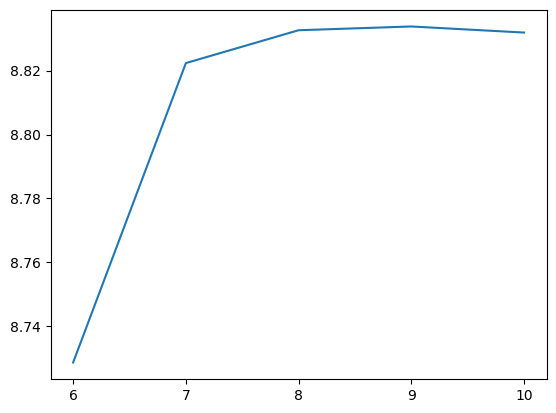

,下限,上限,0样本数,1样本数,总样本数,箱样本占比,1百分比,0百分比,woe
0,0.0,1.0,59996,2132,62128,0.509196,0.034963,0.983445,3.085217
1,1.0,3.0,773,6358,7131,0.058445,0.104234,0.012687,-2.197665
2,3.0,4.0,125,3887,4012,0.032882,0.063730,0.002065,-3.575122
3,4.0,6.0,84,11902,11986,0.098236,0.195109,0.001393,-4.991878
4,6.0,9.0,21,16060,16081,0.131799,0.263265,0.000361,-6.630388
5,9.0,47.0,7,20667,20674,0.169442,0.338781,0.000131,-7.885991


In [101]:
bins = graphforbestbin(model_data,"直接加购数","good",n=6,q=20,graph=True)
get_woe(bins)